ANÁLISIS EXPLORATORIO DE LOS DATOS

In [77]:
# Cargar librerías
import pandas as pd  # Manejo de dataframes
import numpy as np  # Manejo de arrays

In [78]:
# Cargar datos de sqlite3
import sqlite3

conn = sqlite3.connect("data/df.db")  # Conectar a la base de datos (ruta)
df = pd.read_sql_query("SELECT * FROM df", conn)  # Leer la tabla df
conn.close()  # Cerrar la conexión
df.head()  # Mostrar las primeras 5 filas

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,mean_time,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,target,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,...,7.373651,3.0,4.0,2.0,3,3,0,None,No,No
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,...,7.718969,3.0,2.0,4.0,2,4,1,2016-10-15 00:00:00,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,...,7.013240,2.0,2.0,1.0,3,3,0,None,No,No
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,...,7.193678,4.0,4.0,3.0,2,3,0,None,No,No
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,...,8.006175,4.0,1.0,3.0,3,3,0,None,No,No


# Querys SQL

In [7]:
######################################### QUERYS SQL #########################################

# Promedio de ambiente laboral por departamento
conn = sqlite3.connect("data/df.db")  # Conectar a la base de datos + ruta
pd.read_sql_query(
    "SELECT Department, AVG(EnvironmentSatisfaction) FROM df GROUP BY Department",
    conn,
)  # Leer la tabla df

,Department,AVG(EnvironmentSatisfaction)
0,Human Resources,2.823529
1,Research & Development,2.717246
2,Sales,2.722600


In [8]:
# Promedio de ingresos por genero y departamento
pd.read_sql_query(
    "SELECT Gender, AVG(MonthlyIncome) FROM df GROUP BY Gender", conn
)  # Leer la tabla df

,Gender,AVG(MonthlyIncome)
0,Female,64669.424829
1,Male,65324.017517


# Matriz de correlación

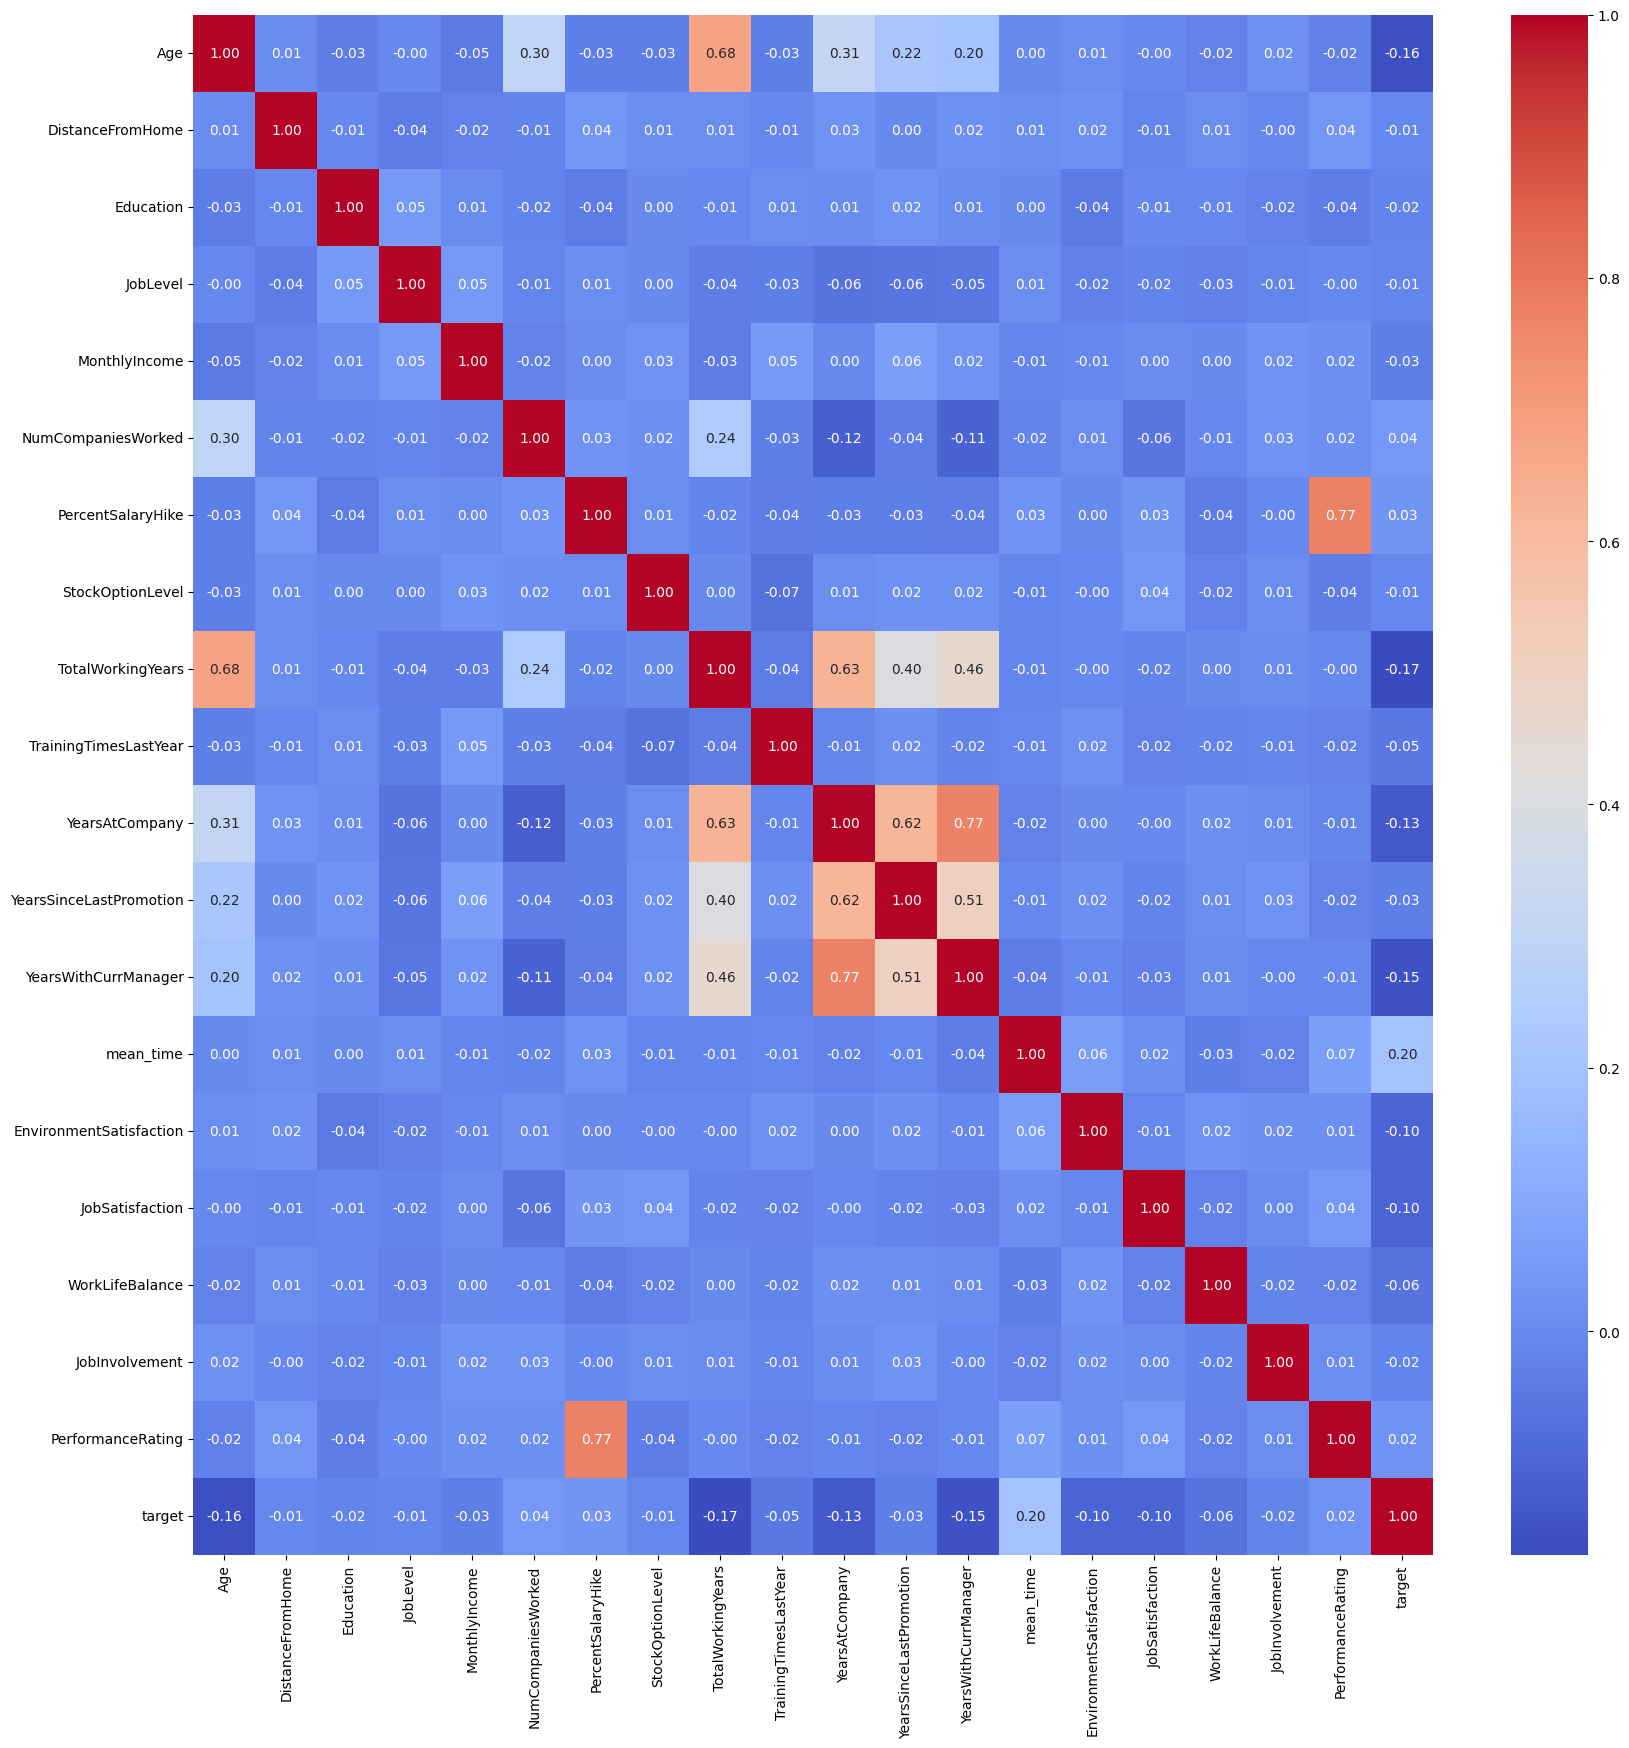

Lista de las variables numéricas con su correlación con TARGET (Total =  20)


target                     1.000000
mean_time                  0.198876
TotalWorkingYears          0.169670
Age                        0.158399
YearsWithCurrManager       0.154692
YearsAtCompany             0.133003
JobSatisfaction            0.102718
EnvironmentSatisfaction    0.101419
WorkLifeBalance            0.063304
TrainingTimesLastYear      0.047586
NumCompaniesWorked         0.042831
PercentSalaryHike          0.033153
YearsSinceLastPromotion    0.031423
MonthlyIncome              0.030160
PerformanceRating          0.024780
Education                  0.017106
JobInvolvement             0.016602
JobLevel                   0.012382
DistanceFromHome           0.009449
StockOptionLevel           0.008164
Name: target, dtype: float64

In [79]:
# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,  # Mostrar los valores
    cmap="coolwarm",  # Colores
    fmt=".2f",  # Formato de los valores
)
plt.show()

# Lista de las variables más correlacionadas con Target en valor absoluto
lista = df.corr(numeric_only=True)["target"].abs().sort_values(ascending=False)
print(
    f"Lista de las variables numéricas con su correlación con TARGET (Total =  {len(lista)})"
)
lista

En un primer vistazo, podemos ver que las variables que más influyen para que un empelado abandone o no la empresa son:
* El tiempo medio que pasa en el trabajo (Entre más tiempo pase, más probable es que abandone la empresa)
* Total de años que a trabajado en toda su vida (Entre más años, menos probable es que abandone la empresa)
* La edad (Entre más joven, más probable es que abandone la empresa)
* Años con el actual jefe (Entre más años, menos probable es que abandone la empresa)
* Satisfacción con el trabajo general (Entre más satisfecho, menos probable es que abandone la empresa)
* Satisfacción con el entorno laboral (Entre más satisfecho, menos probable es que abandone la empresa)

# Multicolinealidad

In [76]:
# Suma absoluta de las correlaciones de las variables numéricas con las demás
lista = (
    df.drop("target", axis=1)  # Eliminar la variable target
    .corr(numeric_only=True)
    .abs()
    .sum(axis=1)
    .sort_values(ascending=False)
) - 1  # Restar 1 para eliminar la correlación consigo misma
print(
    f"Lista de las variables numéricas con su correlación con las demás (Total =  {len(lista)})"
)
lista

Lista de las variables numéricas con su correlación con las demás (Total =  19)


YearsAtCompany             2.653234
TotalWorkingYears          2.603825
YearsWithCurrManager       2.316758
YearsSinceLastPromotion    2.094324
Age                        1.967486
PercentSalaryHike          1.200993
PerformanceRating          1.166256
NumCompaniesWorked         1.079673
JobLevel                   0.494967
TrainingTimesLastYear      0.444363
MonthlyIncome              0.414420
mean_time                  0.374943
StockOptionLevel           0.347400
JobSatisfaction            0.343198
Education                  0.322130
DistanceFromHome           0.306236
WorkLifeBalance            0.304642
EnvironmentSatisfaction    0.289656
JobInvolvement             0.251516
dtype: float64

Se observa multicolinealidad, ya que hay variables que están altamente correlacionadas entre sí, como: YearsAtCompany , TotalWorkingYears y YearsAtCompany y YearsWithCurrManager y Age.

Esto puede tener un impacto negativo en el modelo porque: 
* Coeficientes poco confiables: La multicolinealidad hace que los coeficientes de regresión sean menos precisos y más difíciles de interpretar. Los coeficientes pueden tener magnitudes inesperadas y signos opuestos a lo que se espera intuitivamente.

* Inestabilidad en los coeficientes: Pequeños cambios en los datos de entrada pueden llevar a grandes cambios en los coeficientes estimados. Esto hace que el modelo sea inestable y menos confiable.

* Dificultad en la interpretación: La multicolinealidad dificulta la interpretación de cómo una variable afecta a la variable de respuesta de manera independiente, ya que las variables están altamente correlacionadas y es difícil discernir su impacto individual.

* Menor precisión en las predicciones: La multicolinealidad puede aumentar la varianza de los coeficientes, lo que resulta en intervalos de confianza más amplios y predicciones menos precisas. Esto puede llevar a una menor capacidad predictiva del modelo.

* Problemas en la selección de variables: Puede hacer que sea difícil determinar qué variables son realmente importantes en el modelo y cuáles no, lo que puede llevar a decisiones subóptimas en la selección de características.

* Sesgos en los coeficientes: Los coeficientes estimados pueden estar sesgados debido a la multicolinealidad, lo que significa que no representan de manera precisa la verdadera relación entre las variables predictoras y la variable de respuesta.

* Dificultad en la identificación de causas: Si estás interesado en identificar las causas subyacentes de un fenómeno, la multicolinealidad puede hacer que sea difícil determinar qué variables realmente contribuyen al efecto observado.

* Mayor complejidad en el modelo: A veces, para lidiar con la multicolinealidad, los modelos pueden volverse más complejos al agregar términos de interacción o realizar transformaciones en las variables. Esto puede hacer que el modelo sea más difícil de interpretar y mantener.

A la hora de modelar, se tendrán en cuenta estas variables para no tener problemas de multicolinealidad, regularizando el modelo.

# Análisis gráfico

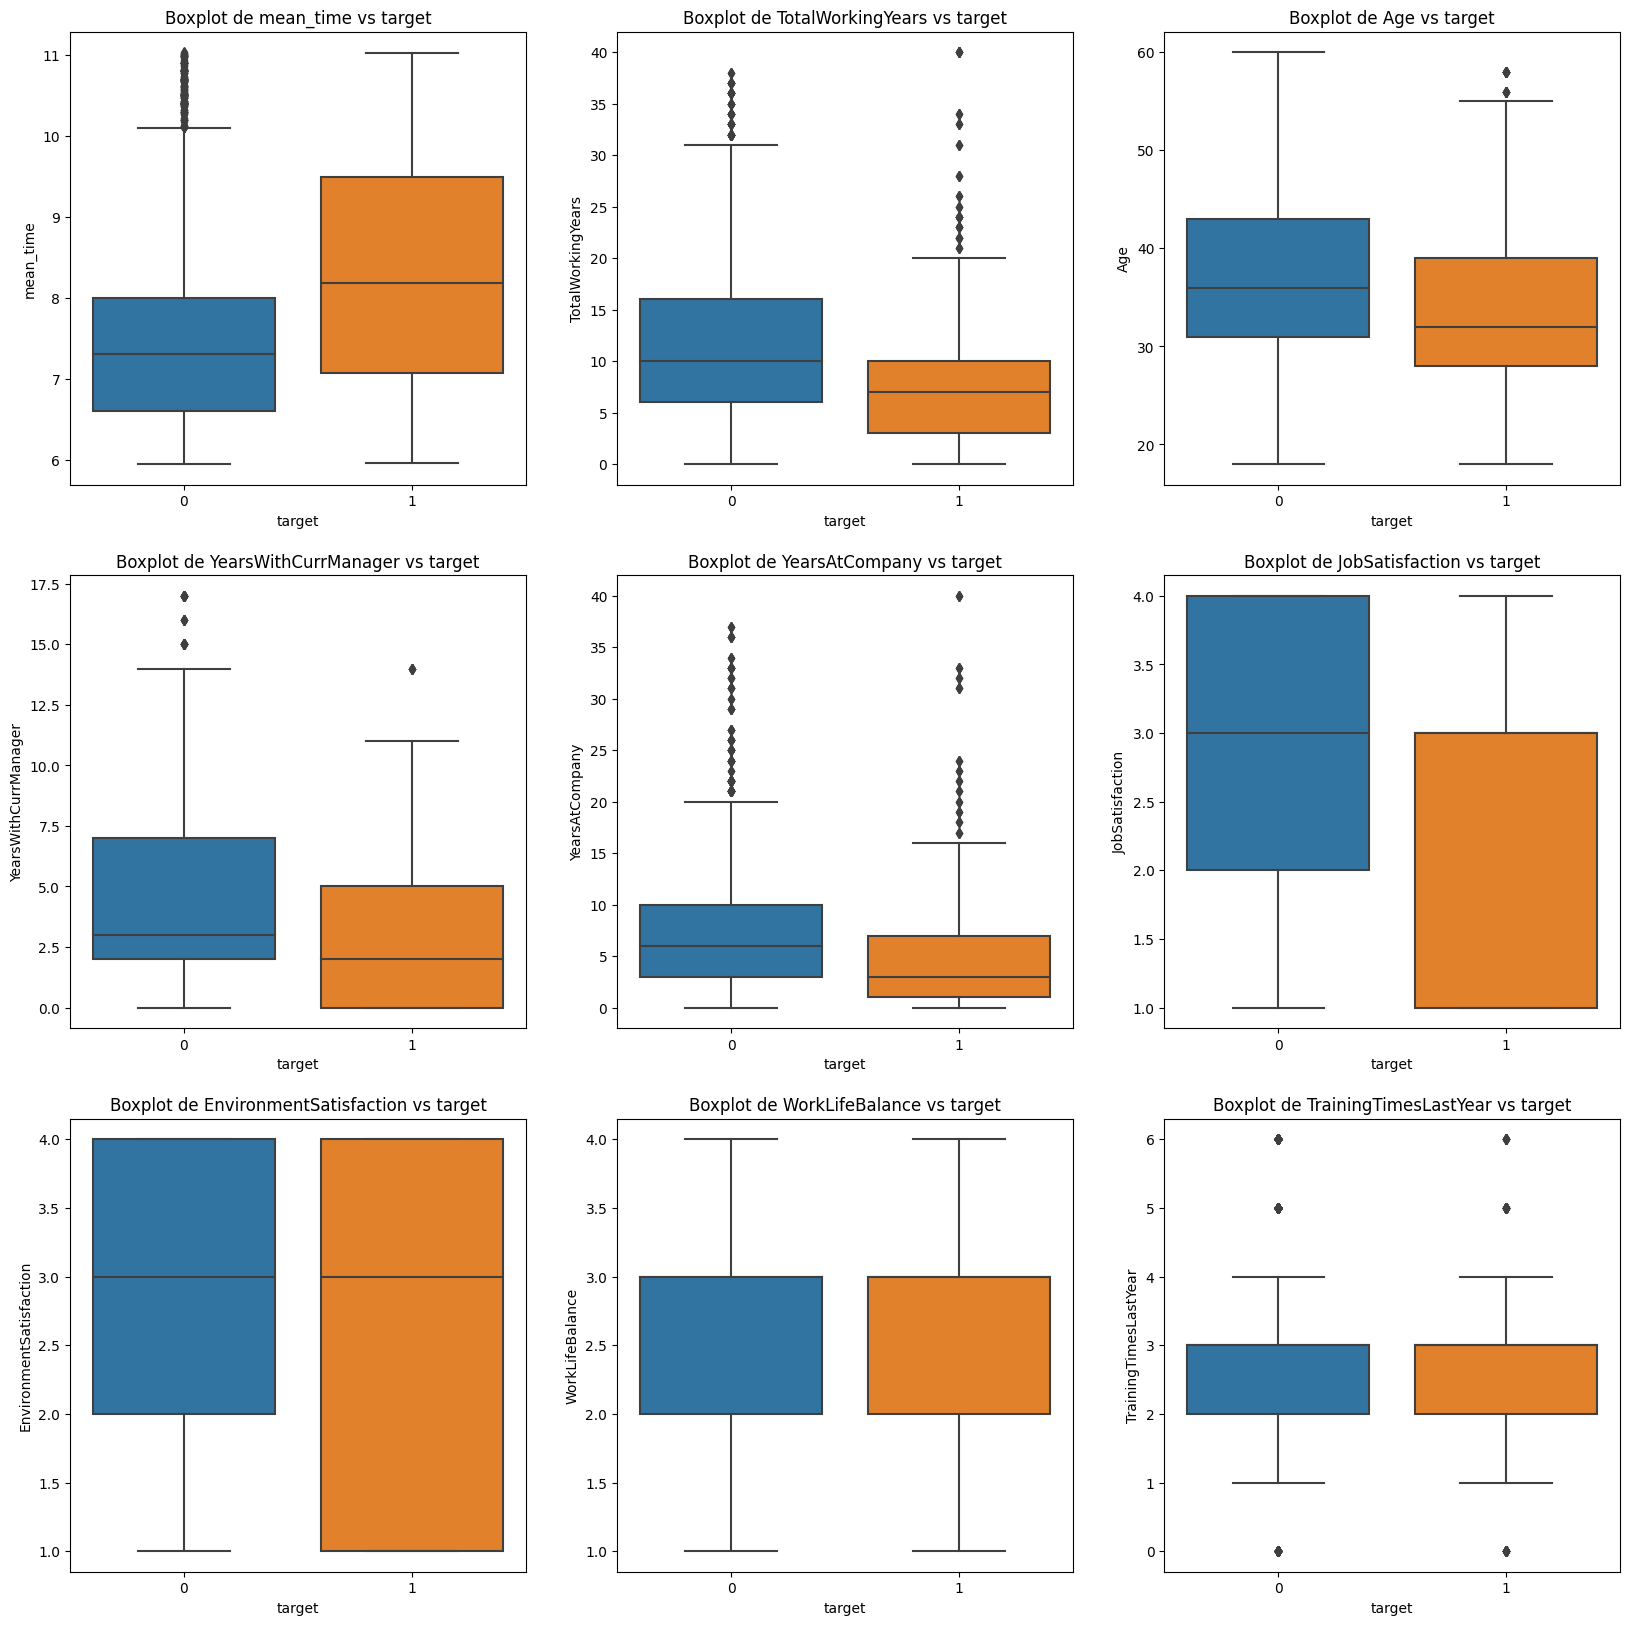

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Tamaño de la figura
for i, var in enumerate(lista.index[1:10]):  # Recorrer las variables
    plt.subplot(3, 3, i + 1)  # Crear un subplot
    sns.boxplot(x="target", y=var, data=df)  # Crear el boxplot
    plt.title(f"Boxplot de {var} vs target")  # Título
    plt.xlabel("target")  # Etiqueta eje x
    plt.ylabel(var)  # Etiqueta eje y
plt.show()

De los boxplots, podemos analizar algunos casos importantes de las variables más correlacionadas de mayor a menor:

* mean_time: Los que SI abandonan la empresa tienen un tiempo medio en la empresa promedio de (8.31) y (7.58) horas para los que NO abandonan
* TotalWorkingYears: Los que SI abandonan la empresa tienen un tiempo total trabajado en su vida promedio de (8.27) y (11.87) años para los que NO abandonan
* Age: Los que SI abandonan la empresa tienen una edad promedio de (33.63) y (37.57) años para los que NO abandonan
* YearsWithCurrManager: Los que SI abandonan la empresa tienen unos año promedio con el jefe actual de (2.87) y (4.37) años para los que NO abandonan
* YearsAtCompany: Los que SI abandonan la empresa tienen un Años en la compañia promedio de (5.15) y (7.37) años para los que NO abandonan
* JobSatisfaction: Los que SI abandonan la empresa tienen una satisfacción laboral promedio de (2.47) y (2.78) para los que NO abandonan.
* EnvironmentSatisfaction: Los que SI abandonan la empresa tienen una satisfacción con el ambiente laboral promedio de (2.47) y (2.77) para los que NO abandonan.
* WorkLifeBalance: Los que SI abandonan la empresa tienen un Balance VidaTrabajo promedio de (2.66) y (2.78) para los que NO abandonan.
* TrainingTimesLastYear: Los que SI abandonan la empresa tienen en promedio de veces que los capacitan al año (2.66) y (2.83) para los que NO abandonan

Resumiendo, podemos tener las siguientes hipótesis:
* El tiempo medio influye porque un empleado con más tiempo en la empresa tiende a desertar por cansancio laboral
* Los jovenes son los que más tienden a renunciar, posiblemente por eso las variables TotalWorkingYears, Age, YearsAtCompany, Age y YearsWithCurrManager tienen una correlación fuerte, ya que los jovenes tienen menos años trabajados en su vida, menos años en la empresa, menos años con el jefe actual y menos edad
* La calificación de los empleados hacia la empresa es muy negativa, de forma general, en el ambiente laboral y en la calidad de vida de los empleados. Esto posiblemente se relaciona con el alto tiempo que los empleados están en la empresa
* La empresa brinda muy poca capacitación a los empleados, aunque no hay una relación fuerte con la deserción, la empresa debería revisar sus estrategias


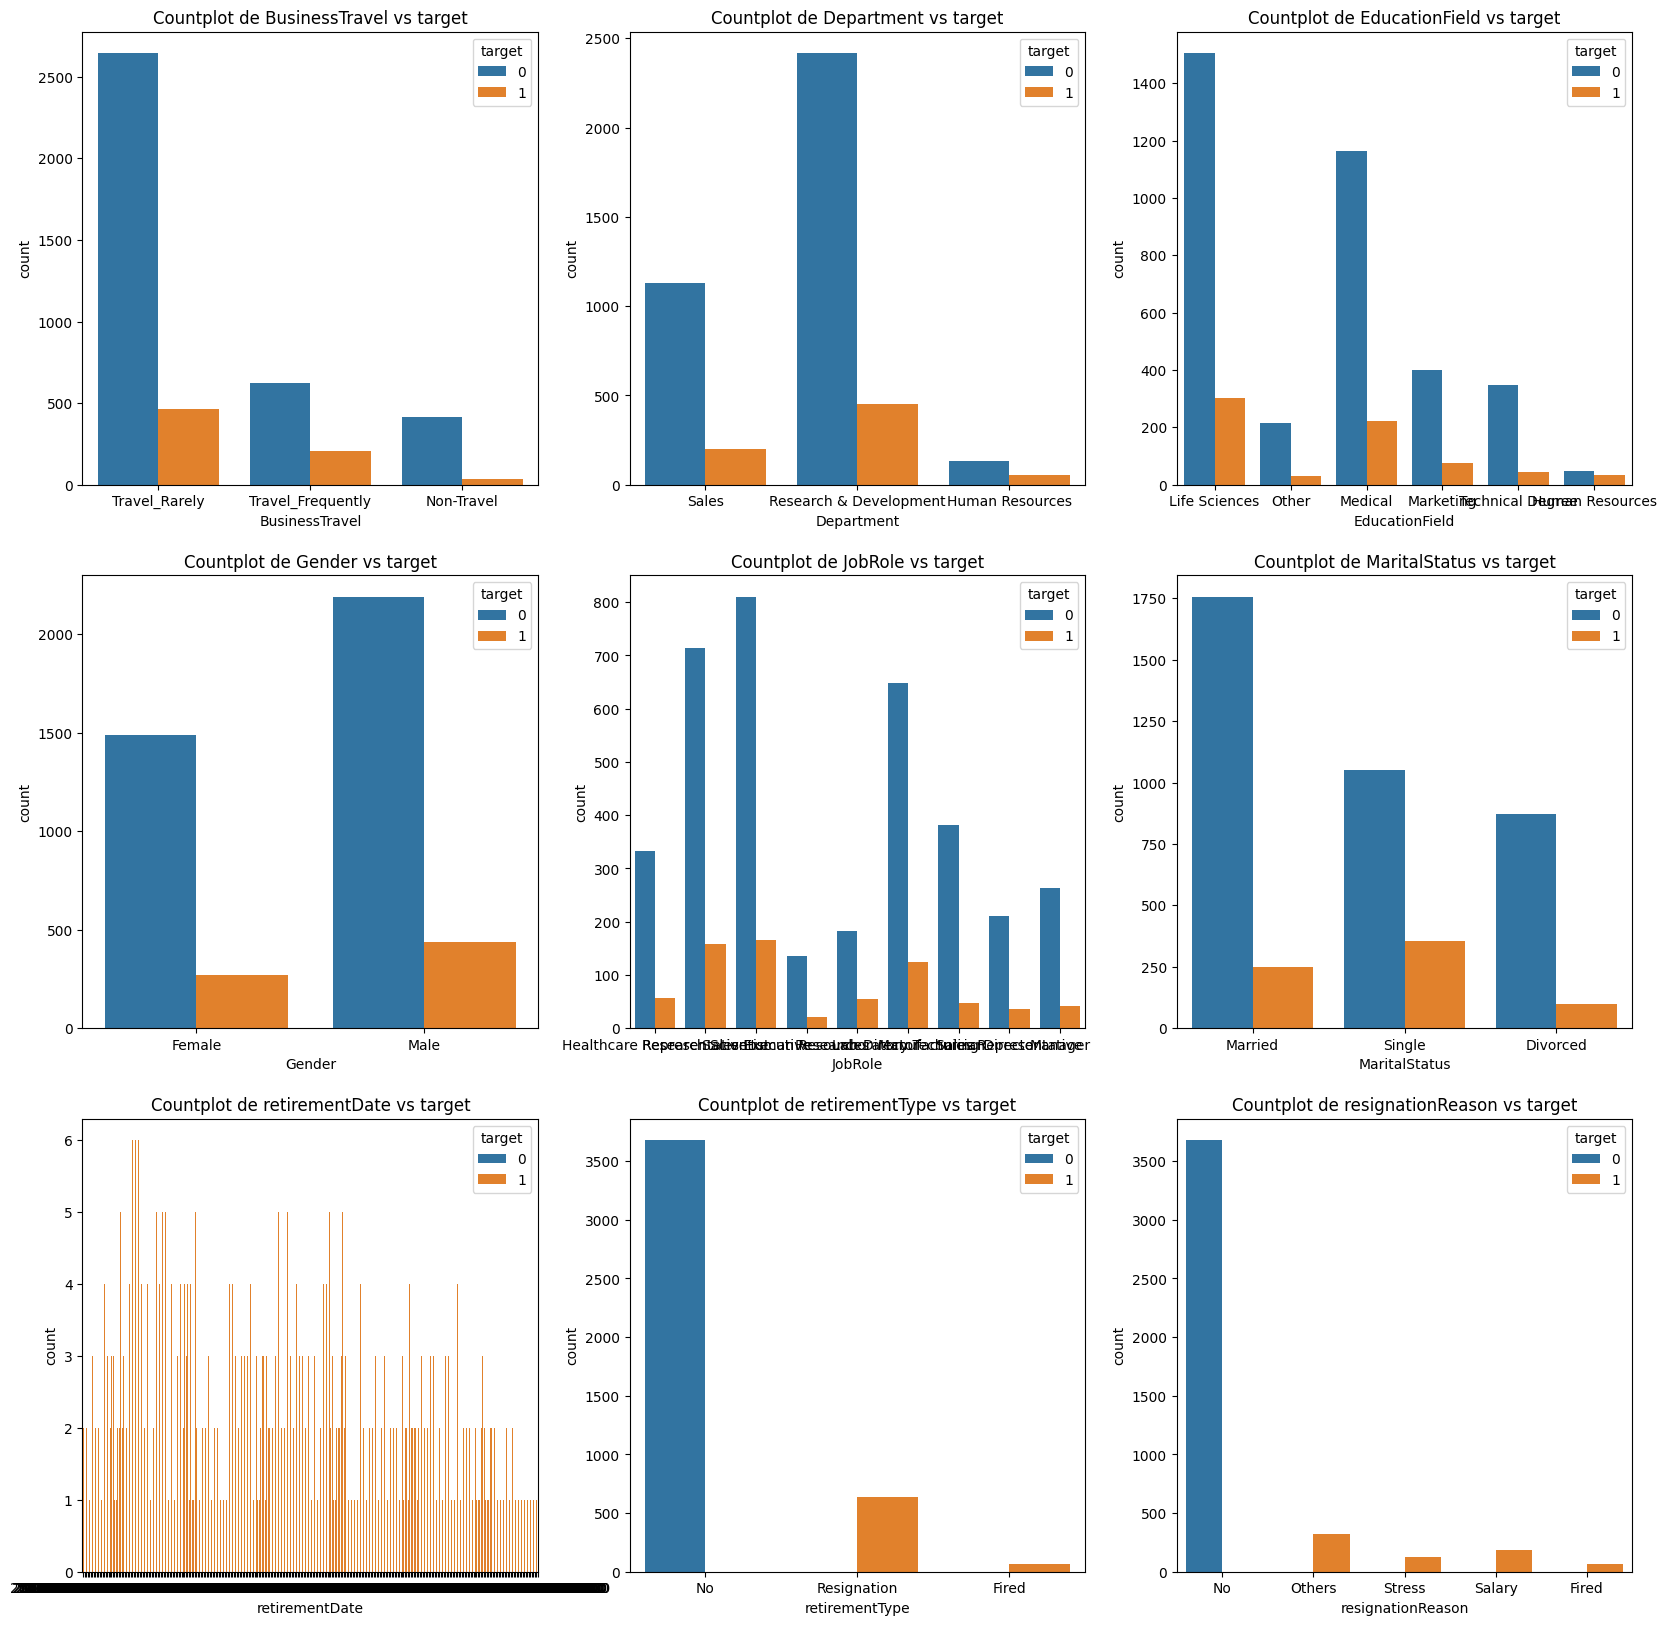

In [15]:
# Analizar gráficamente las variables categoricas con Target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i, var in enumerate(df.select_dtypes("object").columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=var, hue="target", data=df)
    plt.title(f"Countplot de {var} vs target")
plt.show()

Resumiendo, podemos tener las siguientes hipótesis:
* La mayoría que abandona la empresa rara vez viajaba
* La mayoría que abandona la empresa son de Investigación y desarrollo
* La mayoría que abandona la empresa son Estudiaron ciencias de la vida y Medicina
* La mayoría que abandona la empresa son hombres
* La mayoría que abandona la empresa son solteros
